Install Essential Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
import re, string, unicodedata
from string import punctuation
from termcolor import colored
from collections import Counter
import PIL.Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, recall_score, precision_score, log_loss
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import feature_extraction, model_selection, metrics
from sklearn.linear_model import LogisticRegression
from IPython.display import Image, HTML

import keras
import tensorflow as tf
from keras.preprocessing import text, sequence
from keras.models import Sequential
from keras.layers import Dense,Embedding,Dropout
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore

import seaborn as sns
import nltk
from nltk.corpus import stopwords
from textblob import Word
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
import re, string, unicodedata
from string import punctuation

from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

from sklearn import set_config
set_config(print_changed_only = False)

#to see full text:
pd.set_option("display.max_colwidth", 1)

print(colored("\nNECESSARY LIBRARIES WERE SUCCESFULLY IMPORTED...", color = "green", attrs = ["bold", "dark"]))


Import Dataset

In [ ]:
# Exploring the Dataset
data = pd.read_csv('C:/Users/Janice/Downloads/spam.csv', encoding='latin-1')

print(colored("\nDATASETS WERE SUCCESFULLY LOADED...",  color = "green", attrs = ["bold", "dark"]))
data.head(n=10)


DATASETS WERE SUCCESFULLY LOADED...


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives around here though",NaN,NaN,NaN
5,spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv",NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. They treat me like aids patent.,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030,NaN,NaN,NaN


Data Cleaning

In [ ]:
# Rename and Drop Unnecessary columns, Drop null value, and Drop duplicated value
#rename dataset columns
data.rename(columns = {"v1": "target", "v2": "text"}, inplace = True)

#drop unnecessary columns
data.drop(["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], axis = 1, inplace = True)

# Check if there are any null values in the DataFrame
if data.isnull().values.any():
    data.dropna(inplace = True)
    print(colored("There are {} null values in the dataset".format(data.isnull().sum()), color = "green", attrs = ["bold", "dark"]))
else:
    print(colored("No null values found in the dataset.", color="green", attrs=["bold", "dark"]))

# Drop duplicated values from the dataset
duplicated_entries = data.duplicated().sum()
if duplicated_entries > 0:
    print(colored(f"There are {duplicated_entries} duplicated values in the dataset dropped successfully..", color="green", attrs=["bold", "dark"]))
    data.drop_duplicates(inplace=True)
else:
    print(colored("No duplicated values found in the dataset.", color="green", attrs=["bold", "dark"]))


No null values found in the dataset.
There are 403 duplicated values in the dataset dropped successfully..


In [ ]:
#Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers.
def clean_text(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

data['message_clean'] = data['text'].apply(clean_text)
print(colored("\nUPPERCASE LETTER CONVERTED TO LOWER CASE, SQUARE BRACKET TEXT REMOVED, LINK REMOVED, PUNCTUATION REMOVED, AND NUMBERS REMOVED...", color = "green", attrs = ["bold", "dark"]))
data.head()


UPPERCASE LETTER CONVERTED TO LOWER CASE, SQUARE BRACKET TEXT REMOVED, LINK REMOVED, PUNCTUATION REMOVED, AND NUMBERS REMOVED...


,target,text,message_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry in a wkly comp to win fa cup final tkts may text fa to to receive entry questionstd txt ratetcs apply
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah i dont think he goes to usf he lives around here though


In [ ]:
#remove stop words
stop_words = stopwords.words('english')
more_stopwords = ['u', 'im', 'c']
stop_words = stop_words + more_stopwords

def remove_stopwords(text):
    text = ' '.join(word for word in text.split(' ') if word not in stop_words)
    return text
    
data['message_clean'] = data['message_clean'].apply(remove_stopwords)
print(colored("\nSTOP WORDS WERE SUCCESFULLY DELETED...", color = "green", attrs = ["bold", "dark"]))
data.head()


STOP WORDS WERE SUCCESFULLY DELETED...


,target,text,message_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry wkly comp win fa cup final tkts may text fa receive entry questionstd txt ratetcs apply
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goes usf lives around though


In [ ]:
def remove_non_english(text):
    # This pattern matches any word that contains non-ASCII characters
    english_only = re.sub(r'[^\x00-\x7F]+', ' ', text)
    return english_only

data['message_clean'] = data['message_clean'].apply(remove_non_english)
print(colored("\nNON-ENGLISH CHARACTERS WERE SUCCESFULLY DELETED...", color = "green", attrs = ["bold", "dark"]))
data.head()


NON-ENGLISH CHARACTERS WERE SUCCESFULLY DELETED...


,target,text,message_clean
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry wkly comp win fa cup final tkts may text fa receive entry questionstd txt ratetcs apply
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goes usf lives around though


Data exploratory and analysis

In [ ]:
#get the length of the message
data['message_len'] = data['message_clean'].apply(lambda x: len(x.split(' ')))
data.head()

,target,text,message_clean,message_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazy available bugis n great world la e buffet cine got amore wat,16
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif oni,5
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry wkly comp win fa cup final tkts may text fa receive entry questionstd txt ratetcs apply,23
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say,6
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goes usf lives around though,8


In [ ]:
#Group ham and spam
balance_counts = data.groupby('target')['target'].agg('count').values
balance_counts

array([4516,  653], dtype=int64)

In [ ]:
#Defining the color
primary_blue = '#1f77b4'  
primary_grey = '#7f7f7f'

fig = go.Figure()
fig.add_trace(go.Bar(
    x=['ham'],
    y=[balance_counts[0]],
    name='ham',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color=primary_blue
))
fig.add_trace(go.Bar(
    x=['spam'],
    y=[balance_counts[1]],
    name='spam',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color=primary_grey
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Dataset distribution by target</span>'
)
fig.show()

In [ ]:
#Visualize the percentage of spam and ham in pie chart
fig = px.pie(data_frame = data, names = "target", hole = 0.4, title = "counts in 'target' variable", 
             width = 1000, height = 500, color_discrete_sequence = px.colors.sequential.Sunset_r)

fig.update_traces(textposition = "inside", textinfo = "percent+label",
                  marker = dict(line = dict(width = 1.5, color = "#410F01")))

fig.update_layout(title_x = 0.5, title_font = dict(size = 30), uniformtext_minsize = 25)

fig.show()

In [ ]:
#Visualize the length of ham and spam (ham message shows shorter message length)
ham_df = data[data['target'] == 'ham']['message_len'].value_counts().sort_index()
spam_df = data[data['target'] == 'spam']['message_len'].value_counts().sort_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=ham_df.index,
    y=ham_df.values,
    name='ham',
    fill='tozeroy',
    marker_color=primary_blue,
))
fig.add_trace(go.Scatter(
    x=spam_df.index,
    y=spam_df.values,
    name='spam',
    fill='tozeroy',
    marker_color=primary_grey,
))
fig.update_layout(
    title='<span style="font-size:32px; font-family:Times New Roman">Message Length Distribution for Ham and Spam Categories</span>'
)
fig.update_xaxes(range=[0, 70])
fig.show()

Tokenization

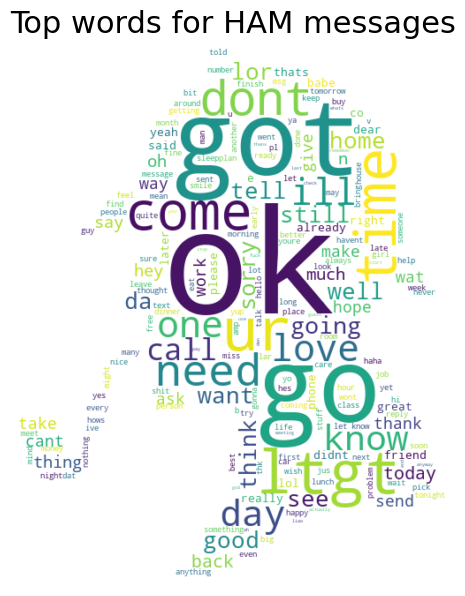

In [ ]:
#TOP WORDS FOR HAM MESSAGES
# Load the image file
masking = PIL.Image.open('C:/Users/Janice/Downloads/AI_MaskForWordCloud.png', 'r')
masking = masking.convert("RGB")  # Ensure it's in RGB

# Convert the PIL Image to a NumPy array
mask_array = np.array(masking)

# Now create the WordCloud object with the NumPy array as the mask
wc = WordCloud(
    background_color='white',
    max_words=200,
    mask=mask_array,  # Use the NumPy array here
)

# Assuming 'data' and 'message_clean' are defined as DataFrame and column
wc.generate(' '.join(text for text in data.loc[data['target'] == 'ham', 'message_clean']))

# Display the generated word cloud
plt.figure(figsize=(15,7))
plt.title('Top words for HAM messages', fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Assuming 'data' is your DataFrame and 'message_clean' is the column with text data
# Count the most common words in non-spam messages
count1 = Counter(" ".join(data[data['target']=='ham']["message_clean"]).split()).most_common(20)
df1 = pd.DataFrame(count1, columns=["words in non-spam", "count"])

# Visualize in bar chart using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df1["words in non-spam"],
    y=df1["count"],
    text=df1["count"],
    textposition='auto',
    marker_color='#1f77b4'  # primary blue color
))

# Update layout for better visualization
fig.update_layout(
    title='<span style="font-size:22px; font-family:Times New Roman">More Frequent Words in Non-Spam Messages</span>',
    xaxis_title="Words",
    yaxis_title="Number",
    xaxis={'categoryorder':'total descending'}  # this line orders the bars based on count
)
fig.show()

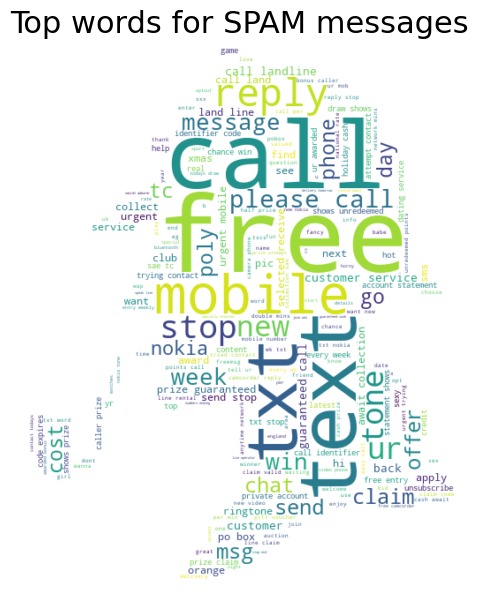

In [ ]:
# TOP WORDS FOR SPAM MESSAGES

# Assuming 'data' and 'message_clean' are defined as DataFrame and column
wc.generate(' '.join(text for text in data.loc[data['target'] == 'spam', 'message_clean']))

# Display the generated word cloud
plt.figure(figsize=(15,7))
plt.title('Top words for SPAM messages', fontdict={'size': 22,  'verticalalignment': 'bottom'})
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Assuming 'data' is your DataFrame and 'message_clean' is the column with text data
# Count the most common words in non-spam messages
count1 = Counter(" ".join(data[data['target']=='spam']["message_clean"]).split()).most_common(20)
df1 = pd.DataFrame(count1, columns=["words in spam", "count"])

# Visualize in bar chart using Plotly
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df1["words in spam"],
    y=df1["count"],
    text=df1["count"],
    textposition='auto',
    marker_color='#7f7f7f' 
))

# Update layout for better visualization
fig.update_layout(
    title='<span style="font-size:22px; font-family:Times New Roman">More Frequent Words in Spam Messages</span>',
    xaxis_title="Words",
    yaxis_title="Number",
    xaxis={'categoryorder':'total descending'}  # this line orders the bars based on count
)
fig.show()

Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()

# Lemmatize string
def lemmatize_word(text):
    # Split text into words based on spaces
    words = text.split()
    # Lemmatize each word and assume 'v' (verb) as the default POS tag
    lemmas = ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])
    return lemmas

# Assuming 'data' is your DataFrame and 'message_clean' is the column with text to lemmatize
data["message_clean"] = data["message_clean"].apply(lemmatize_word)

print(colored("\nDATA SUCCESSFULLY LEMMATIZED...", color="green", attrs=["bold", "dark"]))
data.head()


DATA SUCCESSFULLY LEMMATIZED...


,target,text,message_clean,message_len
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazy available bugis n great world la e buffet cine get amore wat,16
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni,5
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry wkly comp win fa cup final tkts may text fa receive entry questionstd txt ratetcs apply,23
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say,6
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think go usf live around though,8


Vectorization

In [ ]:
vect = CountVectorizer(min_df=0.01, max_df=0.95)
vect.fit(data['message_clean'])
# .fit() method is used to learn the vocabulary of the text data.(understanding and mapping the structure)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.95, max_features=None, min_df=0.01,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# examine the fitted vocabulary
print(colored("\nFEATURE NAME HAVE BEEN IDENTIFIED SUCCESSFULLY...", color = "green", attrs = ["bold", "dark"]))
vect.get_feature_names_out()
# retrieves an array of all feature names (or words) that have been identified from the data after fitting the model.


FEATURE NAME HAVE BEEN IDENTIFIED SUCCESSFULLY...


array(['already', 'also', 'anything', 'around', 'ask', 'babe', 'back',
       'buy', 'call', 'cant', 'care', 'cash', 'claim', 'come', 'contact',
       'cos', 'could', 'da', 'day', 'dear', 'didnt', 'dont', 'end',
       'even', 'every', 'feel', 'find', 'finish', 'first', 'free', 'get',
       'give', 'go', 'gonna', 'good', 'great', 'guy', 'happy', 'hey',
       'hi', 'home', 'hope', 'ill', 'ive', 'keep', 'know', 'last',
       'later', 'leave', 'let', 'life', 'like', 'lol', 'look', 'lor',
       'love', 'ltgt', 'make', 'mean', 'meet', 'message', 'miss',
       'mobile', 'money', 'morning', 'msg', 'much', 'need', 'new', 'next',
       'night', 'number', 'oh', 'ok', 'one', 'phone', 'pick', 'place',
       'plan', 'please', 'pls', 'prize', 'really', 'reply', 'right',
       'say', 'see', 'send', 'service', 'show', 'sleep', 'something',
       'soon', 'sorry', 'start', 'still', 'stop', 'sure', 'take', 'talk',
       'tell', 'text', 'thank', 'thats', 'thing', 'think', 'time',
       'today'

In [ ]:
# transform training data into a 'document-term matrix','sparse matrix'
#exp (0, 31) 0: means the first data entry which is (aa) 31: means for the word in the 32th vocabulary learned from the training data. 1: means it is repeated once
simple_train_dtm = vect.transform(data['message_clean'])
print(colored("\nSPARSE MATRIX...", color = "green", attrs = ["bold", "dark"]))
print(simple_train_dtm) #sparse matrix(only store none zero matrix value)


SPARSE MATRIX...
  (0, 30)	1
  (0, 32)	1
  (0, 35)	1
  (0, 119)	1
  (1, 73)	1
  (2, 29)	1
  (2, 101)	1
  (2, 111)	1
  (2, 124)	1
  (3, 0)	1
  (3, 85)	2
  (4, 3)	1
  (4, 21)	1
  (4, 32)	1
  (4, 105)	1
  (5, 6)	1
  (5, 38)	1
  (5, 51)	1
  (5, 73)	1
  (5, 87)	1
  (5, 95)	1
  (6, 23)	1
  (6, 51)	2
  (8, 8)	1
  (8, 12)	2
  :	:
  (5161, 116)	1
  (5163, 8)	1
  (5163, 29)	1
  (5163, 30)	1
  (5163, 35)	1
  (5163, 80)	1
  (5163, 83)	1
  (5163, 101)	1
  (5164, 8)	1
  (5164, 12)	1
  (5164, 14)	1
  (5164, 81)	1
  (5164, 106)	1
  (5164, 110)	1
  (5165, 32)	1
  (5165, 40)	1
  (5167, 7)	1
  (5167, 29)	1
  (5167, 31)	1
  (5167, 36)	1
  (5167, 51)	1
  (5167, 69)	1
  (5167, 91)	1
  (5167, 114)	1
  (5167, 122)	1


In [ ]:
print(colored("\nDENSE MATRIX...", color = "green", attrs = ["bold", "dark"]))
simple_train_dtm.toarray() #dense matrix (store 0 and non-zero (consider all element))
# transforms the sparse format into a full numpy array that includes every possible position in the matrix, filled with zeros where no data was previously recorded in the sparse matrix.
# the first col zero means the feature name "already" does not appear in the first document(any piece of written text that is treated as a single entity) bcs it is in the first array


DENSE MATRIX...


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
HTML("""
<style>
h1,h2,h3 {
	margin: 1em 0 0.5em 0;
	font-weight: 600;
	font-family: 'Titillium Web', sans-serif;
	position: relative;  
	font-size: 36px;
	line-height: 40px;
	padding: 15px 15px 15px 2.5%;
	color: #1E8449;
	box-shadow: 
		inset 0 0 0 1px rgba(246,38,100, 1), 
		inset 0 0 5px rgba(246,3,100, 1),
		inset -285px 0 35px #D5F5E3;
	border-radius: 0 10px 0 15px;
	background: #fff
    
}
</style>
""")
# constructs a DataFrame from the dense matrix. The columns are the vocabulary words extracted and learned from the data.
# pd.DataFrame(matrix, columns=columns)
print(colored("\nOVEREALL VISUALIZATION...", color = "green", attrs = ["bold", "dark"]))
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names_out())


OVEREALL VISUALIZATION...


,already,also,anything,around,ask,babe,back,buy,call,cant,...,week,well,win,wish,wont,work,would,yeah,yes,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5164,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5167,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


Target Encoding

In [ ]:
#Encode the target column to spam = 1, ham = 0
le = LabelEncoder()
le.fit(data['target'])

data['target_encoded'] = le.transform(data['target'])
print(colored("\nTARGET VARIABLE ENCODED SUCCESSFULLY (1 = spam, 0 = ham) ...", color = "green", attrs = ["bold", "dark"]))
data.head()


TARGET VARIABLE ENCODED SUCCESSFULLY (1 = spam, 0 = ham) ...


,target,text,message_clean,message_len,target_encoded
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",go jurong point crazy available bugis n great world la e buffet cine get amore wat,16,0
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni,5,0
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,free entry wkly comp win fa cup final tkts may text fa receive entry questionstd txt ratetcs apply,23,1
3,ham,U dun say so early hor... U c already then say...,dun say early hor already say,6,0
4,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think go usf live around though,8,0


Data Preparation

In [ ]:
#Setting values for labels and feature as y and X(we already did X in vectorizing...)
x = simple_train_dtm        #X put sparse matrix bcs more memory efficient (no zero value)
y = data['target_encoded']
# Splitting the testing and training sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print([np.shape(X_train), np.shape(X_test)])    #(4135, 134) means X_train have 4135 rows and 134 col, (1034, 134) means X_TEST 1034 rows and 134 columns

[(4135, 132), (1034, 132)]


Model Training

In [ ]:
# Create and fit the logistic regression model
# Note: 'C' is the inverse of regularization strength 'alpha': smaller values specify stronger regularization
logreg = LogisticRegression(solver='lbfgs', C=0.1, max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Model Testing

In [ ]:
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)

Model Evaluation

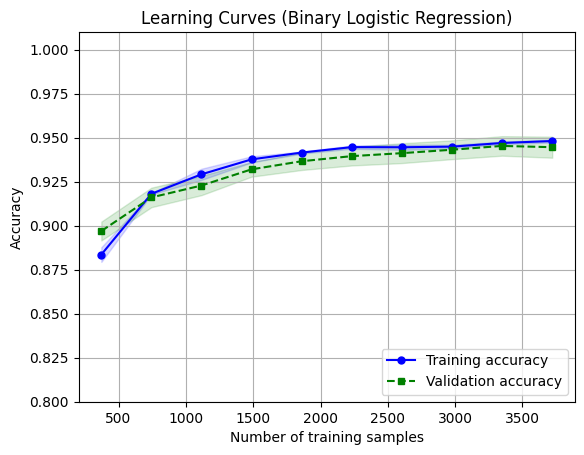

In [ ]:

#CHECK WHETHER OVER FIT
# Define the function to plot learning curves
def plot_learning_curves(model, X, y, title):
    # learning_curve function evaluates the model's performance. The cv=10 parameter means it uses 10-fold cross-validation. 
    # scoring='accuracy' sets the metric for evaluation to accuracy. train_sizes=np.linspace(0.1, 1.0, 10) generates ten evenly 
    # spaced training set sizes from 10% to 100% of the full training dataset.
    train_sizes, train_scores, test_scores = learning_curve( 
        model, X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
    
    # Calculate the mean and standard deviation for both the training scores and the test (validation) scores 
    # across the cross-validation folds for each training set size.
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # plots the mean training scores against the training sizes, marking each point with a circle ('o').
    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
    # fills the area between the mean plus standard deviation and the mean minus standard deviation for the training scores, 
    # providing a visual representation of the variability of the training scores
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')


    # plots the mean validation scores against the training sizes with a dashed line ('--'), marking each point with a square ('s')
    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
    # fills the area between the mean plus standard deviation and the mean minus standard deviation for the validation scores, 
    # showing the variability in the validation scores.
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

    plt.title(title)
    plt.xlabel('Number of training samples')
    plt.ylabel('Accuracy')
    plt.grid()
    plt.legend(loc='lower right')
    plt.ylim([0.8, 1.01])  # Adjust the y-axis limits as needed
    plt.show()

# Plot the learning curves
plot_learning_curves(logreg, X_train, y_train, "Learning Curves (Binary Logistic Regression)")

#EXPLANATION
#If training accuracy is much higher than validation accuracy means overfit
#For our scenario both training and validation score is high and doesnt have a huge gap(closely tgt, small but consistent 
# gap between the training and validation accuracy) means it is performing well

In [ ]:
# Calculate accuracy, recall (actual positive instances that were correctly predicted (return relavant result)), and precision (predicted positive instances that were actually positive (Quality return meaningful stuff))
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

# Format metrics to four decimal places before creating DataFrame
train_accuracy = float(f"{train_accuracy:.4f}")
test_accuracy = float(f"{test_accuracy:.4f}")
test_recall = float(f"{test_recall:.4f}")
test_precision = float(f"{test_precision:.4f}")

# Creates pandas DataFrame.
matrix = np.matrix(np.c_[train_accuracy, test_accuracy, test_precision, test_recall])

models = pd.DataFrame(data = matrix, columns = 
             ['Train Accuracy', 'Test Accuracy', 'Test Precision', 'Test Recall'])

# Styling
header_style = {
    'selector': 'th',
    'props': [('background-color', '#e0ecf8'), ('font-size', '12pt'), ('text-align', 'center'), ('border', '1px solid black'), ('color', '#696969')]
}
cell_style = {
    'selector': 'td',
    'props': [('border', '1px solid black')]
}
styles = [header_style, cell_style]

models_styled = models.style.format('{:.4f}') \
                         .background_gradient(cmap='Greys') \
                         .set_table_styles(styles) \
                         .set_properties(**{'text-align': 'center'})

# Display styled DataFrame
models_styled


,Train Accuracy,Test Accuracy,Test Precision,Test Recall
0,0.9497,0.9371,0.8922,0.6276


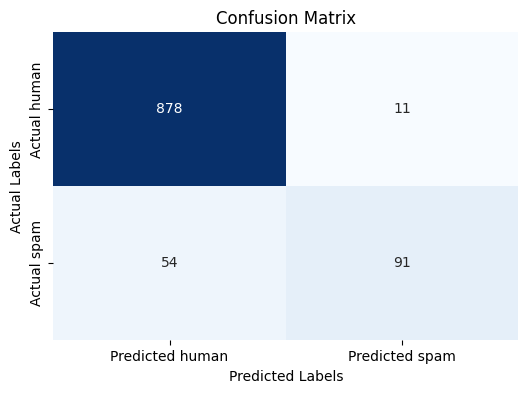

In [ ]:
# Compute confusion matrix
m_confusion_test = metrics.confusion_matrix(y_test, logreg.predict(X_test))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(m_confusion_test, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted human", "Predicted spam"],
            yticklabels=["Actual human", "Actual spam"])
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Calculate the total number of predictions
total_predictions = np.sum(m_confusion_test)

# Identify the false positives count (Predicted as spam but actually human)
false_positives = m_confusion_test[0, 1]

# Calculate the percentage of false positives
false_positive_percentage = (false_positives / total_predictions) * 100

# Creates pandas DataFrame.
matrix = np.matrix(np.c_[false_positive_percentage])
models = pd.DataFrame(data = matrix, columns = 
             ['False Positive Rate (%)'])

models_styled = models.style.format('{:.4f}') \
                             .background_gradient(cmap='Greys') \
                             .set_table_styles(styles) \
                             .set_properties(**{'text-align': 'center'})
# Display styled DataFrame
models_styled


,False Positive Rate (%)
0,1.0638
